# Download Open Food Proudcts Data

In [1]:
!wget https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv.gz 
!ls 

--2025-10-14 06:51:49--  https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv.gz
Resolving static.openfoodfacts.org (static.openfoodfacts.org)... 213.36.253.214
Connecting to static.openfoodfacts.org (static.openfoodfacts.org)|213.36.253.214|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://openfoodfacts-ds.s3.eu-west-3.amazonaws.com/en.openfoodfacts.org.products.csv.gz [following]
--2025-10-14 06:51:49--  https://openfoodfacts-ds.s3.eu-west-3.amazonaws.com/en.openfoodfacts.org.products.csv.gz
Resolving openfoodfacts-ds.s3.eu-west-3.amazonaws.com (openfoodfacts-ds.s3.eu-west-3.amazonaws.com)... 3.5.206.249, 3.5.205.131
Connecting to openfoodfacts-ds.s3.eu-west-3.amazonaws.com (openfoodfacts-ds.s3.eu-west-3.amazonaws.com)|3.5.206.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1164633310 (1.1G) [application/gzip]
Saving to: ‘en.openfoodfacts.org.products.csv.gz’

en.openfoodfacts.or 100%[==

#### Import Libraries

In [2]:
import os
import duckdb
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
from matplotlib import pyplot as plt
from io import BytesIO

# Load Data into DuckDB

In [3]:
if not os.path.exists("openfoodfacts.duckdb"):

    con = duckdb.connect("openfoodfacts.duckdb")
    
    # Create a table from the GZIP CSV
    con.execute("""
        CREATE OR REPLACE TABLE products AS
        SELECT *
        FROM read_csv_auto(
            'en.openfoodfacts.org.products.csv.gz',
            delim='\t',
            header=True
        );
        """)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

# Check **products** table, Number of Columns and few column names

In [4]:
# list tables
con = duckdb.connect("openfoodfacts.duckdb")
tables = con.execute("PRAGMA show_tables;").fetchdf()
print(tables)

# get all column names
columns = con.execute("PRAGMA table_info('products');").fetchdf()
print("Total Columns:", len(columns))
columns[:10]

       name
0  products
Total Columns: 214


,cid,name,type,notnull,dflt_value,pk
0,0,code,VARCHAR,False,None,False
1,1,url,VARCHAR,False,None,False
2,2,creator,VARCHAR,False,None,False
3,3,created_t,BIGINT,False,None,False
4,4,created_datetime,TIMESTAMP WITH TIME ZONE,False,None,False
5,5,last_modified_t,BIGINT,False,None,False
6,6,last_modified_datetime,TIMESTAMP WITH TIME ZONE,False,None,False
7,7,last_modified_by,VARCHAR,False,None,False
8,8,last_updated_t,BIGINT,False,None,False
9,9,last_updated_datetime,TIMESTAMP WITH TIME ZONE,False,None,False


In [5]:
for col in columns['name']:
    print(col)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
last_modified_by
last_updated_t
last_updated_datetime
product_name
abbreviated_product_name
generic_name
quantity
packaging
packaging_tags
packaging_en
packaging_text
brands
brands_tags
brands_en
categories
categories_tags
categories_en
origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
ingredients_tags
ingredients_analysis_tags
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutrition_data
additives_n
additives
additives_tags
additives_en
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
food_groups
food_groups_tags
food_groups_en
states
states_tags
states_en
brand_owner
environmental_score_score
environmental_score_grade
nutrient_levels_tags
p

# View sample products data

In [6]:
sample_food_products_df = con.execute("SELECT * from products LIMIT 5").df()
sample_food_products_df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g,carbohydrates-total_100g
0,00000002,http://world-en.openfoodfacts.org/product/0000...,moon-rabbit,1760278649,2025-10-12 14:17:29+00:00,1760278653,2025-10-12 14:17:33+00:00,moon-rabbit,1760278653,2025-10-12 14:17:33+00:00,...,None,<NA>,None,None,None,None,None,None,None,None
1,00000003,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1752485388,2025-07-14 09:29:48+00:00,1752485389,2025-07-14 09:29:49+00:00,None,1752485389,2025-07-14 09:29:49+00:00,...,None,<NA>,None,None,None,None,None,None,None,None
2,00000004,http://world-en.openfoodfacts.org/product/0000...,elcoco,1560176426,2019-06-10 14:20:26+00:00,1748094869,2025-05-24 13:54:29+00:00,smoothie-app,1748094869,2025-05-24 13:54:29+00:00,...,None,<NA>,None,None,None,None,None,None,None,None
3,00000005,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1754314021,2025-08-04 13:27:01+00:00,1754314023,2025-08-04 13:27:03+00:00,None,1754314023,2025-08-04 13:27:03+00:00,...,None,<NA>,None,None,None,None,None,None,None,None
4,00000006,http://world-en.openfoodfacts.org/product/0000...,moon-rabbit,1760212975,2025-10-11 20:02:55+00:00,1760218930,2025-10-11 21:42:10+00:00,ascharao,1760218930,2025-10-11 21:42:10+00:00,...,None,<NA>,None,None,None,None,None,None,None,None


In [7]:
for key, value in sample_food_products_df.loc[1].items():
    if not pd.isna(value):
        print(key, "=", value)

code = 00000003
url = http://world-en.openfoodfacts.org/product/00000003
creator = openfoodfacts-contributors
created_t = 1752485388
created_datetime = 2025-07-14 09:29:48+00:00
last_modified_t = 1752485389
last_modified_datetime = 2025-07-14 09:29:49+00:00
last_updated_t = 1752485389
last_updated_datetime = 2025-07-14 09:29:49+00:00
countries = en:France
countries_tags = en:france
countries_en = France
states = en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:origins-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-to-be-completed, en:photos-to-be-validated, en:packaging-photo-to-be-selected, en:nutrition-photo-to-be-selected, en:ingredients-photo-to-be-selected, en:front-photo-to-be-selected, en:photos-uploaded
states_tags = en:to-be-comp

## Completeness Score

In [9]:
completeness_info = con.execute("SELECT completeness from products").df()
completeness_info.head()

,completeness
0,0.0500
1,0.0500
2,0.8875
3,0.0500
4,0.0500


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


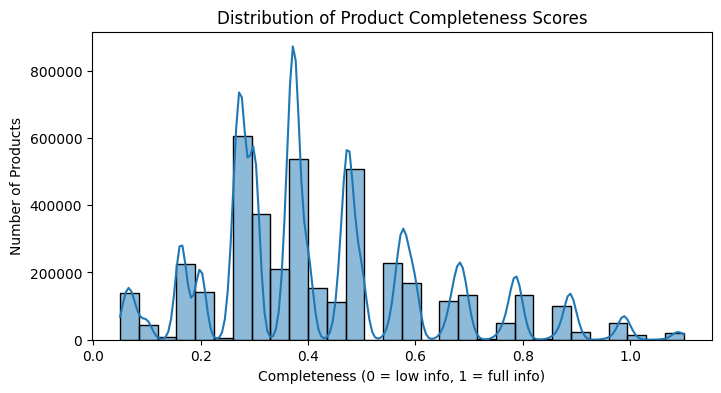

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(completeness_info["completeness"].dropna(), bins=30, kde=True)
plt.title("Distribution of Product Completeness Scores")
plt.xlabel("Completeness (0 = low info, 1 = full info)")
plt.ylabel("Number of Products")
plt.show()

* There is peak between 0.3 and 0.5, almost half of the products from overall products are 30% to 50% complete with information.
* Less than 200k products are available with 80% complete information.

## Get all Nutritional Facts Columns

In [8]:
nutri_cols = [c for c in columns['name'] if '_100g' in c or 'nutrition' in c]
print("Total Nutritional Columns:", len(nutri_cols))
nutri_cols[:10]

Total Nutritional Columns: 129


['no_nutrition_data',
 'image_nutrition_url',
 'image_nutrition_small_url',
 'energy-kj_100g',
 'energy-kcal_100g',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 'butyric-acid_100g']

In [9]:
# Select only product info + nutrition columns
con.execute(f"""CREATE OR REPLACE VIEW nutrition
               AS SELECT code, product_name, quantity, product_quantity, brands_en, countries_en, categories_en, serving_size, serving_quantity,
               nutriscore_score, nutriscore_grade, food_groups_en, nutrient_levels_tags, image_url
              {','.join(f'"{col}"' for col in nutri_cols)} FROM products WHERE energy_100g IS NOT NULL
              """)

In [10]:
# total number of rows
import humanize
c = con.execute("SELECT count(*) as count from products").fetchdf()
print("Total Number of Rows in Products tables:", humanize.intword(c.loc[0, 'count']))


c = con.execute("SELECT count(*) as count from nutrition").fetchdf()
print("Total Number of Rows in Nutrition:", humanize.intword(c.loc[0, 'count']))

Total Number of Rows in Products tables: 4.1 million
Total Number of Rows in Nutrition: 3.0 million


# View Sample Data of Nutritional Food Products

In [11]:
sample_df = con.execute("SELECT * from nutrition LIMIT 5").df()
sample_df.head()

,code,product_name,quantity,product_quantity,brands_en,countries_en,categories_en,serving_size,serving_quantity,nutriscore_score,...,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g,carbohydrates-total_100g
0,00000004,Entrecôesteack - Highland Beef,1000g,1000.0,"pg-tips,green-organic","Brazil,Germany",Nutrition-drink-mix,0g,0.0,15,...,None,<NA>,None,None,None,None,None,None,None,None
1,00000007,granola Bio le Chocolaté,450g,450.0,mg-ricarica,"Germany,Spain","Plant-based foods and beverages,Plant-based fo...",25 gram,25.0,4,...,None,<NA>,None,None,None,None,None,None,None,None
2,00000008,None,700ml,700.0,zuegg,"Germany,United States",Cornish-clotted-cream-shortbread,30 g,30.0,6,...,None,<NA>,None,None,None,None,None,None,None,None
3,00000009,xytitol pastilles,700ml,700.0,xylimgxyling,"Germany,Spain","Sandwiches,Wraps,it:gestione-sovrappeso,it:obe...",0g,0.0,-11,...,None,<NA>,None,None,None,None,None,None,None,None
4,00000010,xxx,700ml,700.0,xxx,Germany,"Beverages and beverages preparations,Beverages...","17,6g",17.6,<NA>,...,None,<NA>,None,None,None,None,None,None,None,None


In [12]:
for key, value in sample_df.loc[3].items():
    if not pd.isna(value):
        print(key, "=", value)

code = 00000009
product_name = xytitol pastilles
quantity = 700ml
product_quantity = 700.0
brands_en = xylimgxyling
countries_en = Germany,Spain
categories_en = Sandwiches,Wraps,it:gestione-sovrappeso,it:obesita
serving_size = 0g
serving_quantity = 0.0
nutriscore_score = -11
nutriscore_grade = a
food_groups_en = Composite foods,Sandwiches
nutrient_levels_tags = en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-low-quantity
no_nutrition_data = https://images.openfoodfacts.org/images/products/invalid/front_en.66.400.jpg
image_nutrition_url = https://images.openfoodfacts.org/images/products/invalid/nutrition_en.69.400.jpg
image_nutrition_small_url = https://images.openfoodfacts.org/images/products/invalid/nutrition_en.69.200.jpg
energy-kcal_100g = 70.0
energy_100g = 293.0
fat_100g = 0.5
saturated-fat_100g = 0.06
carbohydrates_100g = 2.0
sugars_100g = 0.24
fiber_100g = 88.0
proteins_100g = 18.0
salt_100g = 0.275
sodium_100g = 0.11
vitamin-c_100g =

* It may be possible that some food products may not have image associated that shows nutritional info, we can ignore such products for modeling, as images are required in Task 2.
  

## Get all nutritional food prodcuts for which image_nutrition_url is present

In [13]:
nutrition_df = con.execute("SELECT * from nutrition where image_nutrition_url is not NULL and nutriscore_score is not NULL").df()
print(nutrition_df.shape)
nutrition_df.head()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

(842174, 142)


,code,product_name,quantity,product_quantity,brands_en,countries_en,categories_en,serving_size,serving_quantity,nutriscore_score,...,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g,carbohydrates-total_100g
0,00000004,Entrecôesteack - Highland Beef,1000g,1000.0,"pg-tips,green-organic","Brazil,Germany",Nutrition-drink-mix,0g,0.0,15,...,None,<NA>,None,None,None,None,None,None,None,None
1,00000008,None,700ml,700.0,zuegg,"Germany,United States",Cornish-clotted-cream-shortbread,30 g,30.0,6,...,None,<NA>,None,None,None,None,None,None,None,None
2,00000009,xytitol pastilles,700ml,700.0,xylimgxyling,"Germany,Spain","Sandwiches,Wraps,it:gestione-sovrappeso,it:obe...",0g,0.0,-11,...,None,<NA>,None,None,None,None,None,None,None,None
3,00000013,Powdered peanut butter,300 g,300.0,pbfit,Switzerland,"Snacks,Meals,Rice dishes,Risottos,Powder-peanu...",0g,0.0,3,...,None,<NA>,None,None,None,None,None,None,None,None
4,00000015,Madeleines ChocoLait,1000 g,1000.0,apple-bandit,France,"Snacks,Sweet snacks,Biscuits and cakes,Cakes,C...","21,6g",21.6,20,...,None,<NA>,None,None,None,None,None,None,None,None


## Investigate total number product categories and its distribution

In [14]:
from collections import defaultdict

unique_product_categories = defaultdict(int)

for categories in nutrition_df["categories_en"]:
    if pd.isna(categories):
        unique_product_categories["no_product_category"] += 1
    else:
        for c in categories.split(","):
            unique_product_categories[c] += 1

print("Total Product Categories:", len(unique_product_categories))

Total Product Categories: 52689


In [15]:
product_category_df = pd.DataFrame({'product_category': unique_product_categories.keys(), 
                                    'frequency': unique_product_categories.values()})

product_category_df

,product_category,frequency
0,Nutrition-drink-mix,1
1,Cornish-clotted-cream-shortbread,1
2,Sandwiches,5706
3,Wraps,769
4,it:gestione-sovrappeso,1
...,...,...
52684,ro:toba-curcan,2
52685,uk:мигдаль,1
52686,hu:extrudált-kukorica,1
52687,fr:miels-de-printemps,1


In [16]:
# check data distribution
product_category_df["frequency"].describe(percentiles=[0.5, 0.9, 0.99])

count     52689.000000
mean         96.242821
std        2354.746693
min           1.000000
50%           1.000000
90%          15.000000
99%         874.240000
max      280789.000000
Name: frequency, dtype: float64

* Mean = 96.2 average number of products per category
* Std = 2353.37 extremely high — distribution heavy right tail
* 50% (Median) percentile = half the categories have only 1 product
* 90% percentile = 90% of categories have ≤ 15 products
* 99% percentile = only top 1% categories exceed 872 products

## Top N - bar plot

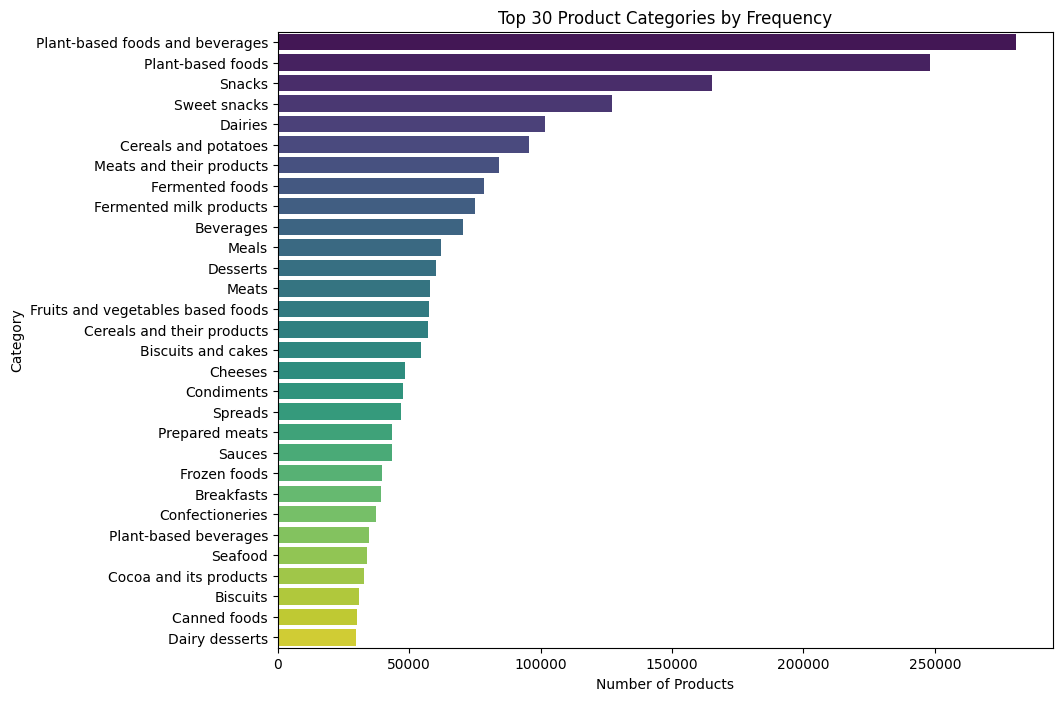

In [17]:
top_n = 30
df_sorted = product_category_df.sort_values(by="frequency", ascending=False)

top_df = df_sorted.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_df, y="product_category", x="frequency", palette="viridis")
plt.title(f"Top {top_n} Product Categories by Frequency")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.show()


* Over 500k food products belong to Plant-based foods and beverages category

# Cumulative Food product distribution by Product category

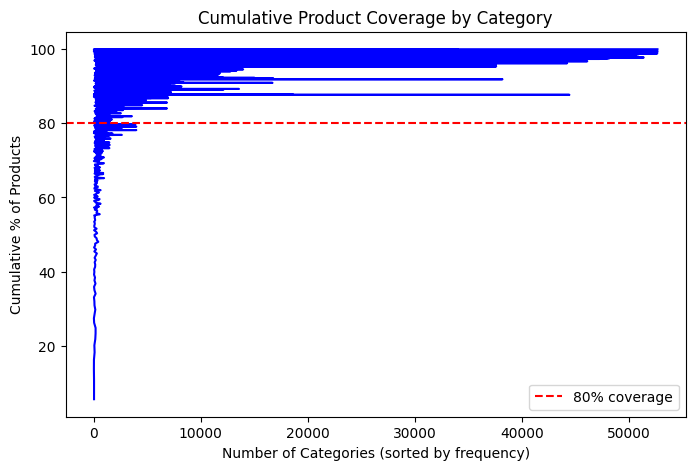

→ 291 categories (~0.55%) cover 80% of all products.


In [18]:
df_sorted = product_category_df.sort_values("frequency", ascending=False)
df_sorted["cum_percent"] = df_sorted["frequency"].cumsum() / df_sorted["frequency"].sum() * 100

plt.figure(figsize=(8, 5))
plt.plot(df_sorted["cum_percent"], color="blue")
plt.axhline(80, color="red", linestyle="--", label="80% coverage")
plt.title("Cumulative Product Coverage by Category")
plt.xlabel("Number of Categories (sorted by frequency)")
plt.ylabel("Cumulative % of Products")
plt.legend()
plt.show()

# how many categories cover 80% of products
n_80 = (df_sorted["cum_percent"] <= 80).sum()
print(f"→ {n_80:,} categories (~{n_80 / len(df_sorted):.2%}) cover 80% of all products.")


In [19]:
product_category_df.to_csv("product_categories.csv", index=False)

# Check Sample data for Particular Product

In [20]:
nutrition_df['product_name'].value_counts()

product_name
Aceite de oliva virgen extra    1154
Panettone                        692
Mozzarella                       678
Ketchup                          625
Spaghetti                        566
                                ... 
Petits bâtons nature 75g           1
Le Bâton de Berger Noisettes       1
La Juste Sèche pur porc            1
Bâton de berger mini poulet        1
Light & Free SKYR A BOIRE          1
Name: count, Length: 559176, dtype: int64

In [21]:
spaghetti_df = nutrition_df[nutrition_df['product_name'] == 'Spaghetti']
print(spaghetti_df.shape)
spaghetti_df.head()

(566, 142)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,code,product_name,quantity,product_quantity,brands_en,countries_en,categories_en,serving_size,serving_quantity,nutriscore_score,...,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g,carbohydrates-total_100g
979,00032155,Spaghetti,1kg,1000.00000,By-sainsbury-s,United Kingdom,"Plant-based foods and beverages,Plant-based fo...",None,NaN,0,...,None,<NA>,None,None,None,None,None,None,None,None
1093,00042687,Spaghetti,1 lb,453.59237,Barilla,United States,"Plant-based foods and beverages,Plant-based fo...",None,NaN,-4,...,None,<NA>,None,None,None,None,None,None,None,None
1495,0008583100261,Spaghetti,None,NaN,lindt-sprungli,United States,"Plant-based foods and beverages,Plant-based fo...",None,NaN,-1,...,None,<NA>,None,None,None,None,None,None,None,None
3188,0011110850058,Spaghetti,None,NaN,Kroger,United States,"Plant-based foods and beverages,Plant-based fo...",56 g (2 oz),56.699046,-1,...,None,<NA>,None,None,None,None,None,None,None,None
3235,0011110863683,Spaghetti,None,NaN,The-kroger-co,United States,"Plant-based foods and beverages,Plant-based fo...",None,NaN,-1,...,None,<NA>,None,None,None,None,None,None,None,None


In [29]:
for key, value in spaghetti_df.loc[979].items():
    if not pd.isna(value):
        print(key, "=", value)

code = 00032155
product_name = Spaghetti
quantity = 1kg
product_quantity = 1000.0
brands_en = By-sainsbury-s
countries_en = United Kingdom
categories_en = Plant-based foods and beverages,Plant-based foods,Pastas,Spaghetti
nutriscore_score = 0
nutriscore_grade = a
food_groups_en = Cereals and potatoes,Cereals
nutrient_levels_tags = en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-low-quantity
no_nutrition_data = https://images.openfoodfacts.org/images/products/000/000/003/2155/front_en.3.400.jpg
image_nutrition_url = https://images.openfoodfacts.org/images/products/000/000/003/2155/nutrition_en.14.400.jpg
image_nutrition_small_url = https://images.openfoodfacts.org/images/products/000/000/003/2155/nutrition_en.14.200.jpg
energy-kj_100g = 696.0
energy-kcal_100g = 164.0
energy_100g = 696.0
fat_100g = 0.7
saturated-fat_100g = 0.2
carbohydrates_100g = 33.2
sugars_100g = 0.7
fiber_100g = 1.5
proteins_100g = 5.2
salt_100g = 0.01
sodium_100g = 0.004


In [44]:
import httpx
def get_image_by_url(image_url: str, timeout_sec: int = 120) -> Image:
    with httpx.Client() as client:
        response = client.get(image_url, timeout=timeout_sec)
        return Image.open(BytesIO(response.content))

#### Front Image

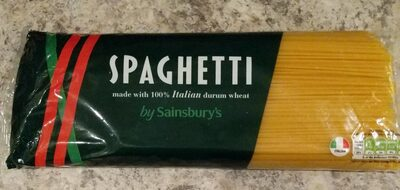

In [45]:
 get_image_by_url("https://images.openfoodfacts.org/images/products/000/000/003/2155/front_en.3.400.jpg")

#### Nutritional Info Image

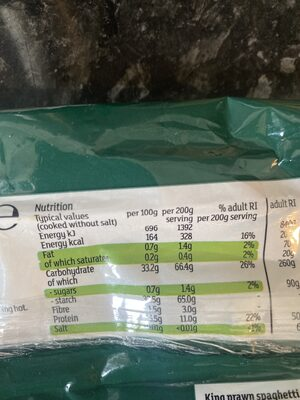

In [46]:
get_image_by_url("https://images.openfoodfacts.org/images/products/000/000/003/2155/nutrition_en.14.400.jpg")

### NutriScore 

* **Wiki** - https://en.wikipedia.org/wiki/Nutri-Score#Overview_of_algorithm
* **pypi** **package** - https://pypi.org/project/pyNutriScore/
  * helps to calculate both score and class for given nutritional fact data

In [37]:
!pip install pyNutriScore

In [43]:
from pyNutriScore import NutriScore

nutrifacts_data = {
        'energy': 1494.0,
        'fibers': 5.3571428571429,
        'fruit_percentage': 0,
        'proteins': 12.5,
        'saturated_fats': 0,
        'unsaturated_fats': 1.785,
        'sodium': 0,
        'sugar': 1.785,
        'carbohydrates': 75,
    }
food_type = 'solid'  # either 'solid' or 'beverage'

nutri_score, nutri_class = NutriScore().calculate(nutrifacts_data, food_type), NutriScore().calculate_class(nutrifacts_data, food_type)

print(nutri_score, nutri_class)

-6 A


## Nutritional Facts Columns

In [27]:
nutri_cols = [col for col in nutri_cols if col.endswith("_100g")]
len(nutri_cols), nutri_cols[:10]

(126,
 ['energy-kj_100g',
  'energy-kcal_100g',
  'energy_100g',
  'energy-from-fat_100g',
  'fat_100g',
  'saturated-fat_100g',
  'butyric-acid_100g',
  'caproic-acid_100g',
  'caprylic-acid_100g',
  'capric-acid_100g'])

## Check Completeness of Each Nutrient

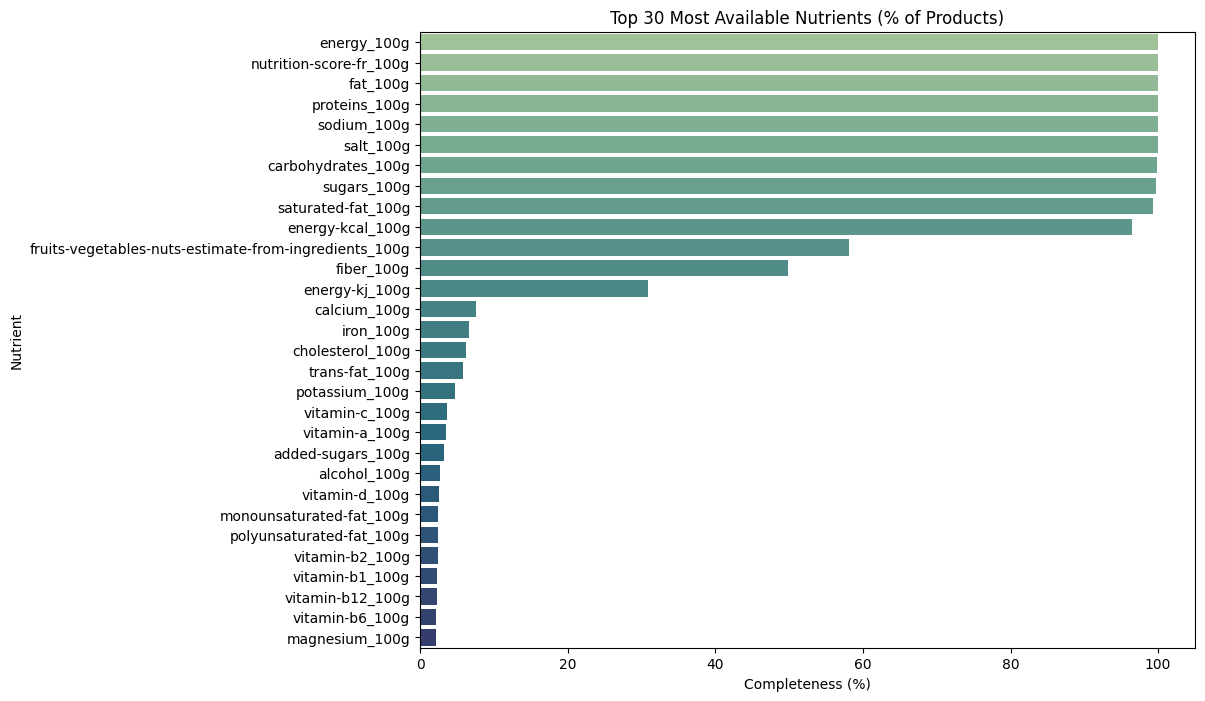

In [28]:
completeness = nutrition_df[nutri_cols].notna().sum().sort_values(ascending=False)

completeness_percent = completeness / len(nutrition_df) * 100

completeness_df = pd.DataFrame({
    "nutrient": completeness.index,
    "count": completeness.values,
    "percent": completeness_percent.values
})

# Top 30 nutrients by availability
top_df = completeness_df.head(30)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_df, y="nutrient", x="percent", palette="crest")
plt.title("Top 30 Most Available Nutrients (% of Products)")
plt.xlabel("Completeness (%)")
plt.ylabel("Nutrient")
plt.show()

* Nutrients like energy_100g, fat_100g, carbohydrates_100g, sugars_100g, and proteins_100g have >90% coverage.

* Nutrients like calcium_100g, iron_100g, cholestrol_100g, trans-fat_100g and others have <10% coverage.

## Dominant Nutrients

In [29]:
dominant = completeness_df[completeness_df["percent"] >= 20]
print(f"Dominant nutrients (≥20% completeness): {len(dominant)}")
dominant.head(10)

Dominant nutrients (≥20% completeness): 13


,nutrient,count,percent
0,energy_100g,842174,100.000000
1,nutrition-score-fr_100g,842174,100.000000
2,fat_100g,842057,99.986107
3,proteins_100g,842042,99.984326
4,sodium_100g,841850,99.961528
5,salt_100g,841850,99.961528
6,carbohydrates_100g,841273,99.893015
7,sugars_100g,839222,99.649479
8,saturated-fat_100g,836820,99.364264
9,energy-kcal_100g,812467,96.472582


* These are the nutrients worth analyzing further for distribution and correlation.

# Data Distribution of Key Nutrients

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


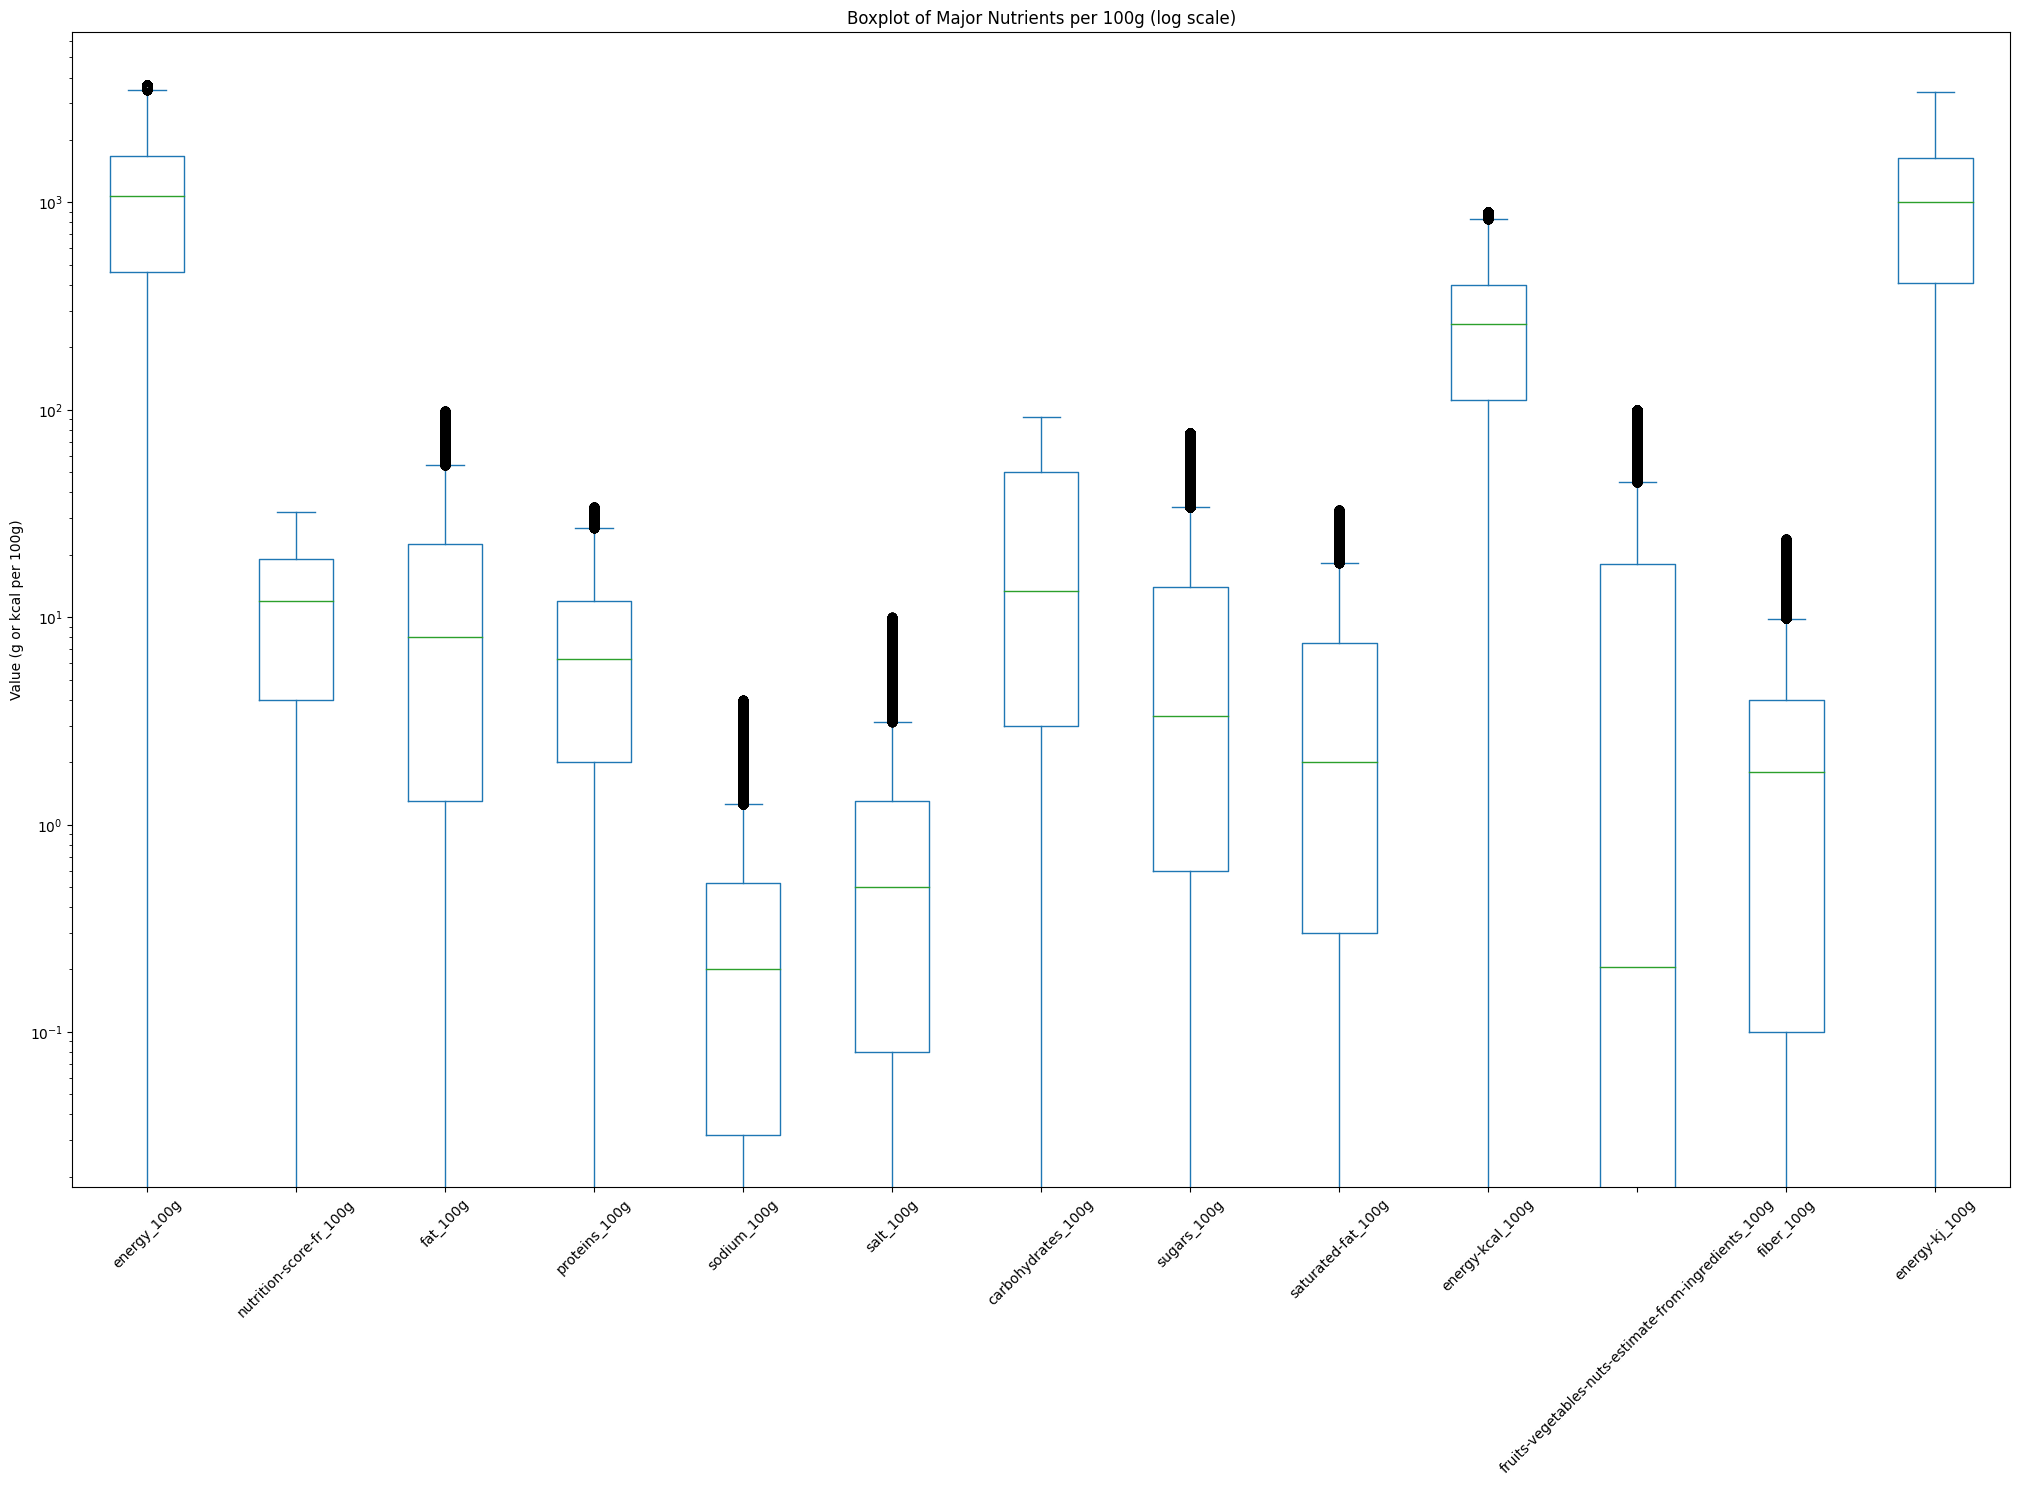

In [32]:
key_nutrients = dominant["nutrient"]

df_key = nutrition_df[key_nutrients]

# Clean up invalid values (negative or extreme outliers)
df_key = df_key[(df_key >= 0) & (df_key < df_key.quantile(0.99))]

df_key.plot(kind='box', figsize=(25, 15), logy=True)
plt.title("Boxplot of Major Nutrients per 100g (log scale)")
plt.ylabel("Value (g or kcal per 100g)")
plt.xticks(rotation=45) 
plt.show()


## Correlation Heatmap among key nutrients

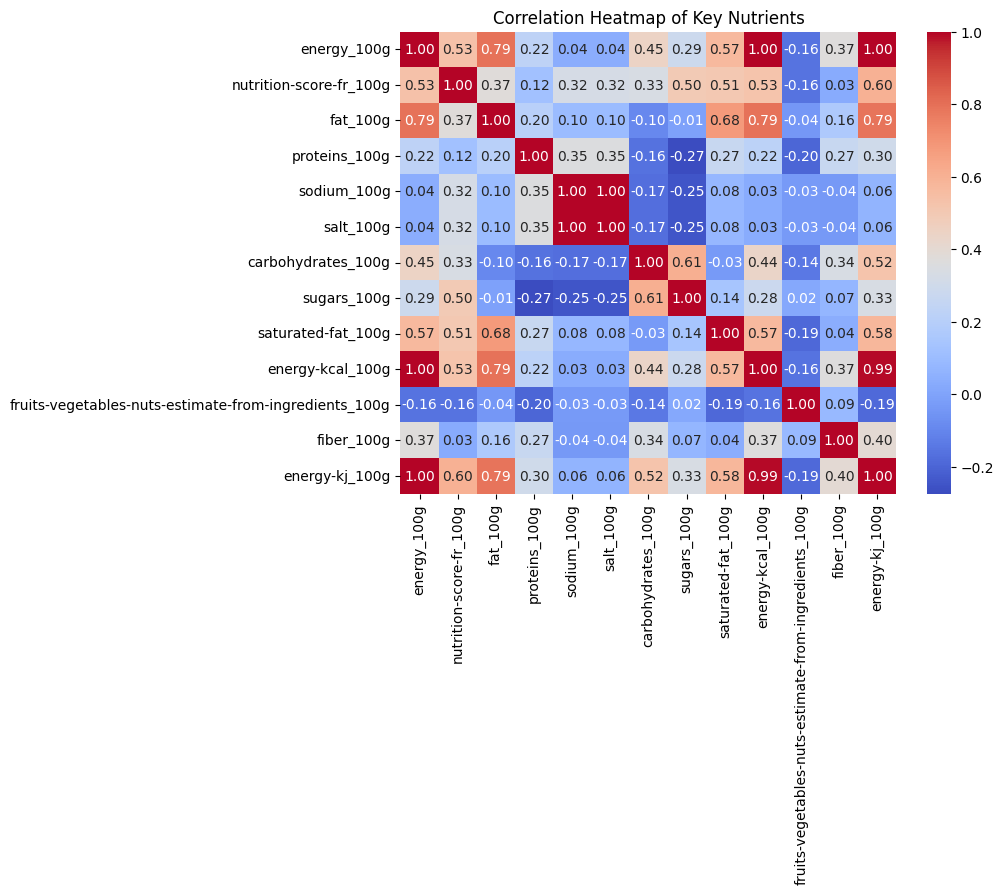

In [33]:
plt.figure(figsize=(8, 6))
corr = df_key.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Nutrients")
plt.show()

* energy-kj_100g and energy-kcal_100g highly correlated (~1.0).

* fat_100g correlates with energy,

* sugars_100g with carbohydrates_100g.

* proteins_100g has negative correlation with carbohydrates_100g and sugars_100g.

## Download Data for OCR Task 2

* For OCR Task, we will need to download products images data for all or sample nutritional food products.
* We also limit products nutritional info images to English language, otherwise will need multi-lingual OCR model
* Downloading images for all 0.8 Million food products would be time-consuming, so we will take the 10k sample products data in a way that:
  * maximizes nutrient coverage (so all 126 nutrients appear at least a few times)
  * ensures diversity (not just the common ones with full data like energy/fat/protein).
  * it helps an OCR model see diverse nutrient layouts (macros, vitamins, acids, etc.).

In [34]:
nutrition_df['is_image_en_lang'] = nutrition_df["image_nutrition_url"].map(lambda url: 'nutrition_en' in url)
nutrition_df['is_image_en_lang'].value_counts()

is_image_en_lang
False    655169
True     187005
Name: count, dtype: int64

In [35]:
nutritions_eng_df = nutrition_df[nutrition_df['is_image_en_lang']]

completeness = nutritions_eng_df[nutri_cols].notna().sum().sort_values(ascending=False)

completeness_percent = completeness / len(nutrition_df) * 100

completeness_df = pd.DataFrame({
    "nutrient": completeness.index,
    "count": completeness.values,
    "percent": completeness_percent.values
})
completeness_df

,nutrient,count,percent
0,energy_100g,187005,22.205031
1,nutrition-score-fr_100g,187005,22.205031
2,fat_100g,186987,22.202894
3,proteins_100g,186984,22.202538
4,salt_100g,186943,22.197669
...,...,...,...
121,sorbitol_100g,1,0.000119
122,acidity_100g,1,0.000119
123,nutrition-score-uk_100g,0,0.000000
124,isomalt_100g,0,0.000000


In [36]:
nutritions_eng_df.shape, completeness_df.shape

((187005, 143), (126, 3))

In [37]:
SAMPLE_SIZE = 10_000 # 10k food products

df = nutritions_eng_df.drop_duplicates(subset='code').reset_index(drop=True)
comp = completeness_df.copy()

#Identify rare nutrients (bottom 20 or where < 0.1% coverage)
rare_nutrients = comp[comp["percent"] < 0.1]["nutrient"].tolist()

# Find rows where each rare nutrient is available
rare_rows = set()
for col in rare_nutrients:
    rare_rows.update(df[df[col].notna()].index.tolist())

rare_df = df.loc[list(rare_rows)]
print(f"Rows with rare nutrients: {len(rare_df)}")

# Compute row completeness across all nutrients
df["filled_count"] = df.notna().sum(axis=1)
df["filled_fraction"] = df["filled_count"] / df.shape[1]

# Sample remaining rows (with high completeness) to reach SAMPLE_SIZE total
remaining_needed = max(0, SAMPLE_SIZE - len(rare_df))
dense_df = df[df["filled_fraction"] >= 0.3]  # threshold adjustable

random_df = dense_df.sample(n=remaining_needed, random_state=42)
sample_df = pd.concat([rare_df, random_df]).drop_duplicates().reset_index(drop=True)
print("Sample Data shape", sample_df.shape)
sample_df.head()

Rows with rare nutrients: 4864
Sample Data shape (10000, 145)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,code,product_name,quantity,product_quantity,brands_en,countries_en,categories_en,serving_size,serving_quantity,nutriscore_score,...,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g,carbohydrates-total_100g,is_image_en_lang,filled_count,filled_fraction
0,0062287212125,Honey Dijon Vinaigrette,350 mL,350.0,renee-s-gourmet,France,"Condiments,Sauces,Salad dressings,Vinaigrettes",15 mL,15.0000,17,...,None,None,None,None,None,None,None,True,NaN,NaN
1,6194005400300,Les classiques Chocolat aux céréales,None,NaN,"saida,said","France,Tunisia","Snacks,Sweet snacks,Cocoa and its products,Cho...",10 g,10.0000,27,...,None,None,None,None,None,None,None,True,NaN,NaN
2,6194005412037,TRIS ( chocolat au lait ),30 g,30.0,"Said,Sotuchoc,Saida",Tunisia,"Snacks,Sweet snacks,Cocoa and its products,Cho...",None,NaN,28,...,None,None,None,None,None,None,None,True,NaN,NaN
3,6194005412075,Tris NOISETTES,30 g,30.0,"Said,Saida",Tunisia,"Snacks,Sweet snacks,Cocoa and its products,Cho...",10 g,10.0000,25,...,None,None,None,None,None,None,None,True,NaN,NaN
4,0043717277402,Kosher Dill Pickles,28 g,28.0,Zergut,United States,Undefined,28.3495g,28.3495,-5,...,None,None,None,None,None,None,None,True,NaN,NaN


In [38]:
sample_completeness = sample_df[nutri_cols].notna().sum().sort_values(ascending=False)

sample_completeness_percent = completeness / len(nutrition_df) * 100

sample_completeness_df = pd.DataFrame({
    "nutrient": sample_completeness.index,
    "count": sample_completeness.values,
    "percent": sample_completeness_percent.values
})
print(sample_completeness_df.shape)
sample_completeness_df

(126, 3)


,nutrient,count,percent
0,energy_100g,10000,22.205031
1,nutrition-score-fr_100g,10000,22.205031
2,salt_100g,9999,22.202894
3,sodium_100g,9999,22.202538
4,fat_100g,9994,22.197669
...,...,...,...
121,acidity_100g,1,0.000119
122,sorbitol_100g,1,0.000119
123,methylsulfonylmethane_100g,0,0.000000
124,isomalt_100g,0,0.000000


In [39]:
sample_df.to_csv("sample_products.csv", index=False)

In [40]:
for key, value in sample_df.loc[0].items():
    if not pd.isna(value):
        print(key, "=", value)

code = 0062287212125
product_name = Honey Dijon Vinaigrette
quantity = 350 mL
product_quantity = 350.0
brands_en = renee-s-gourmet
countries_en = France
categories_en = Condiments,Sauces,Salad dressings,Vinaigrettes
serving_size = 15 mL
serving_quantity = 15.0
nutriscore_score = 17
nutriscore_grade = d
food_groups_en = Fats and sauces,Dressings and sauces
nutrient_levels_tags = en:fat-in-high-quantity,en:saturated-fat-in-moderate-quantity,en:sugars-in-high-quantity,en:salt-in-high-quantity
no_nutrition_data = https://images.openfoodfacts.org/images/products/006/228/721/2125/front_en.24.400.jpg
image_nutrition_url = https://images.openfoodfacts.org/images/products/006/228/721/2125/nutrition_en.26.400.jpg
image_nutrition_small_url = https://images.openfoodfacts.org/images/products/006/228/721/2125/nutrition_en.26.200.jpg
energy-kcal_100g = 400.0
energy_100g = 1670.0
fat_100g = 40.0
saturated-fat_100g = 2.67
monounsaturated-fat_100g = 23.3
polyunsaturated-fat_100g = 13.3
omega-3-fat_100g 

## Data Download Using multi-processing

In [52]:
from tenacity import retry, wait_fixed, stop_after_attempt

DATA_DIR = "products_images"

os.makedirs(DATA_DIR, exist_ok=True)

@retry(wait=wait_fixed(2), stop=stop_after_attempt(5))
def download_and_save(row: pd.Series):
    product_code = row['code']
    image_url = row['image_nutrition_url']

    if 'invalid' in image_url:
        image_url = image_url.replace('invalid', product_code)
    
    image_path = f"{DATA_DIR}/{product_code}.png"
    if not os.path.exists(image_path):
        try:
            image = get_image_by_url(image_url)
            image.save(image_path)
        except Exception as e:
            print("Failed to download image for url:", image_url)
            raise e

In [53]:
from multiprocessing import Pool
from tqdm import tqdm

NUM_WORKERS = 12

with Pool(processes=NUM_WORKERS) as pool:
    list(
            tqdm(
                pool.imap(download_and_save, [row for _, row in sample_df[['code', 'image_nutrition_url']].iterrows()]),
                total=len(sample_df),
                dynamic_ncols=True,
            )
        )

100%|██████████| 10000/10000 [08:12<00:00, 20.30it/s]


In [56]:
!ls

en.openfoodfacts.org.products.csv.gz  product_categories.csv
openfoodfacts.duckdb		      products_images
openfoodfacts.duckdb.wal	      sample_products.csv
